In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

#Importing required modules
from sklearn.cluster import KMeans

pizza = pd.read_csv('pizza.csv')
cities = pd.read_csv('Population.csv')
rando = 120

We will prefix rando as a seed for any ML involved in future steps. This is to regenerate consistent random results.

We will first remove any outliers from the dataset. This includes all datapoints in Hawaii or Alaska as we are focusing on US mainland only.

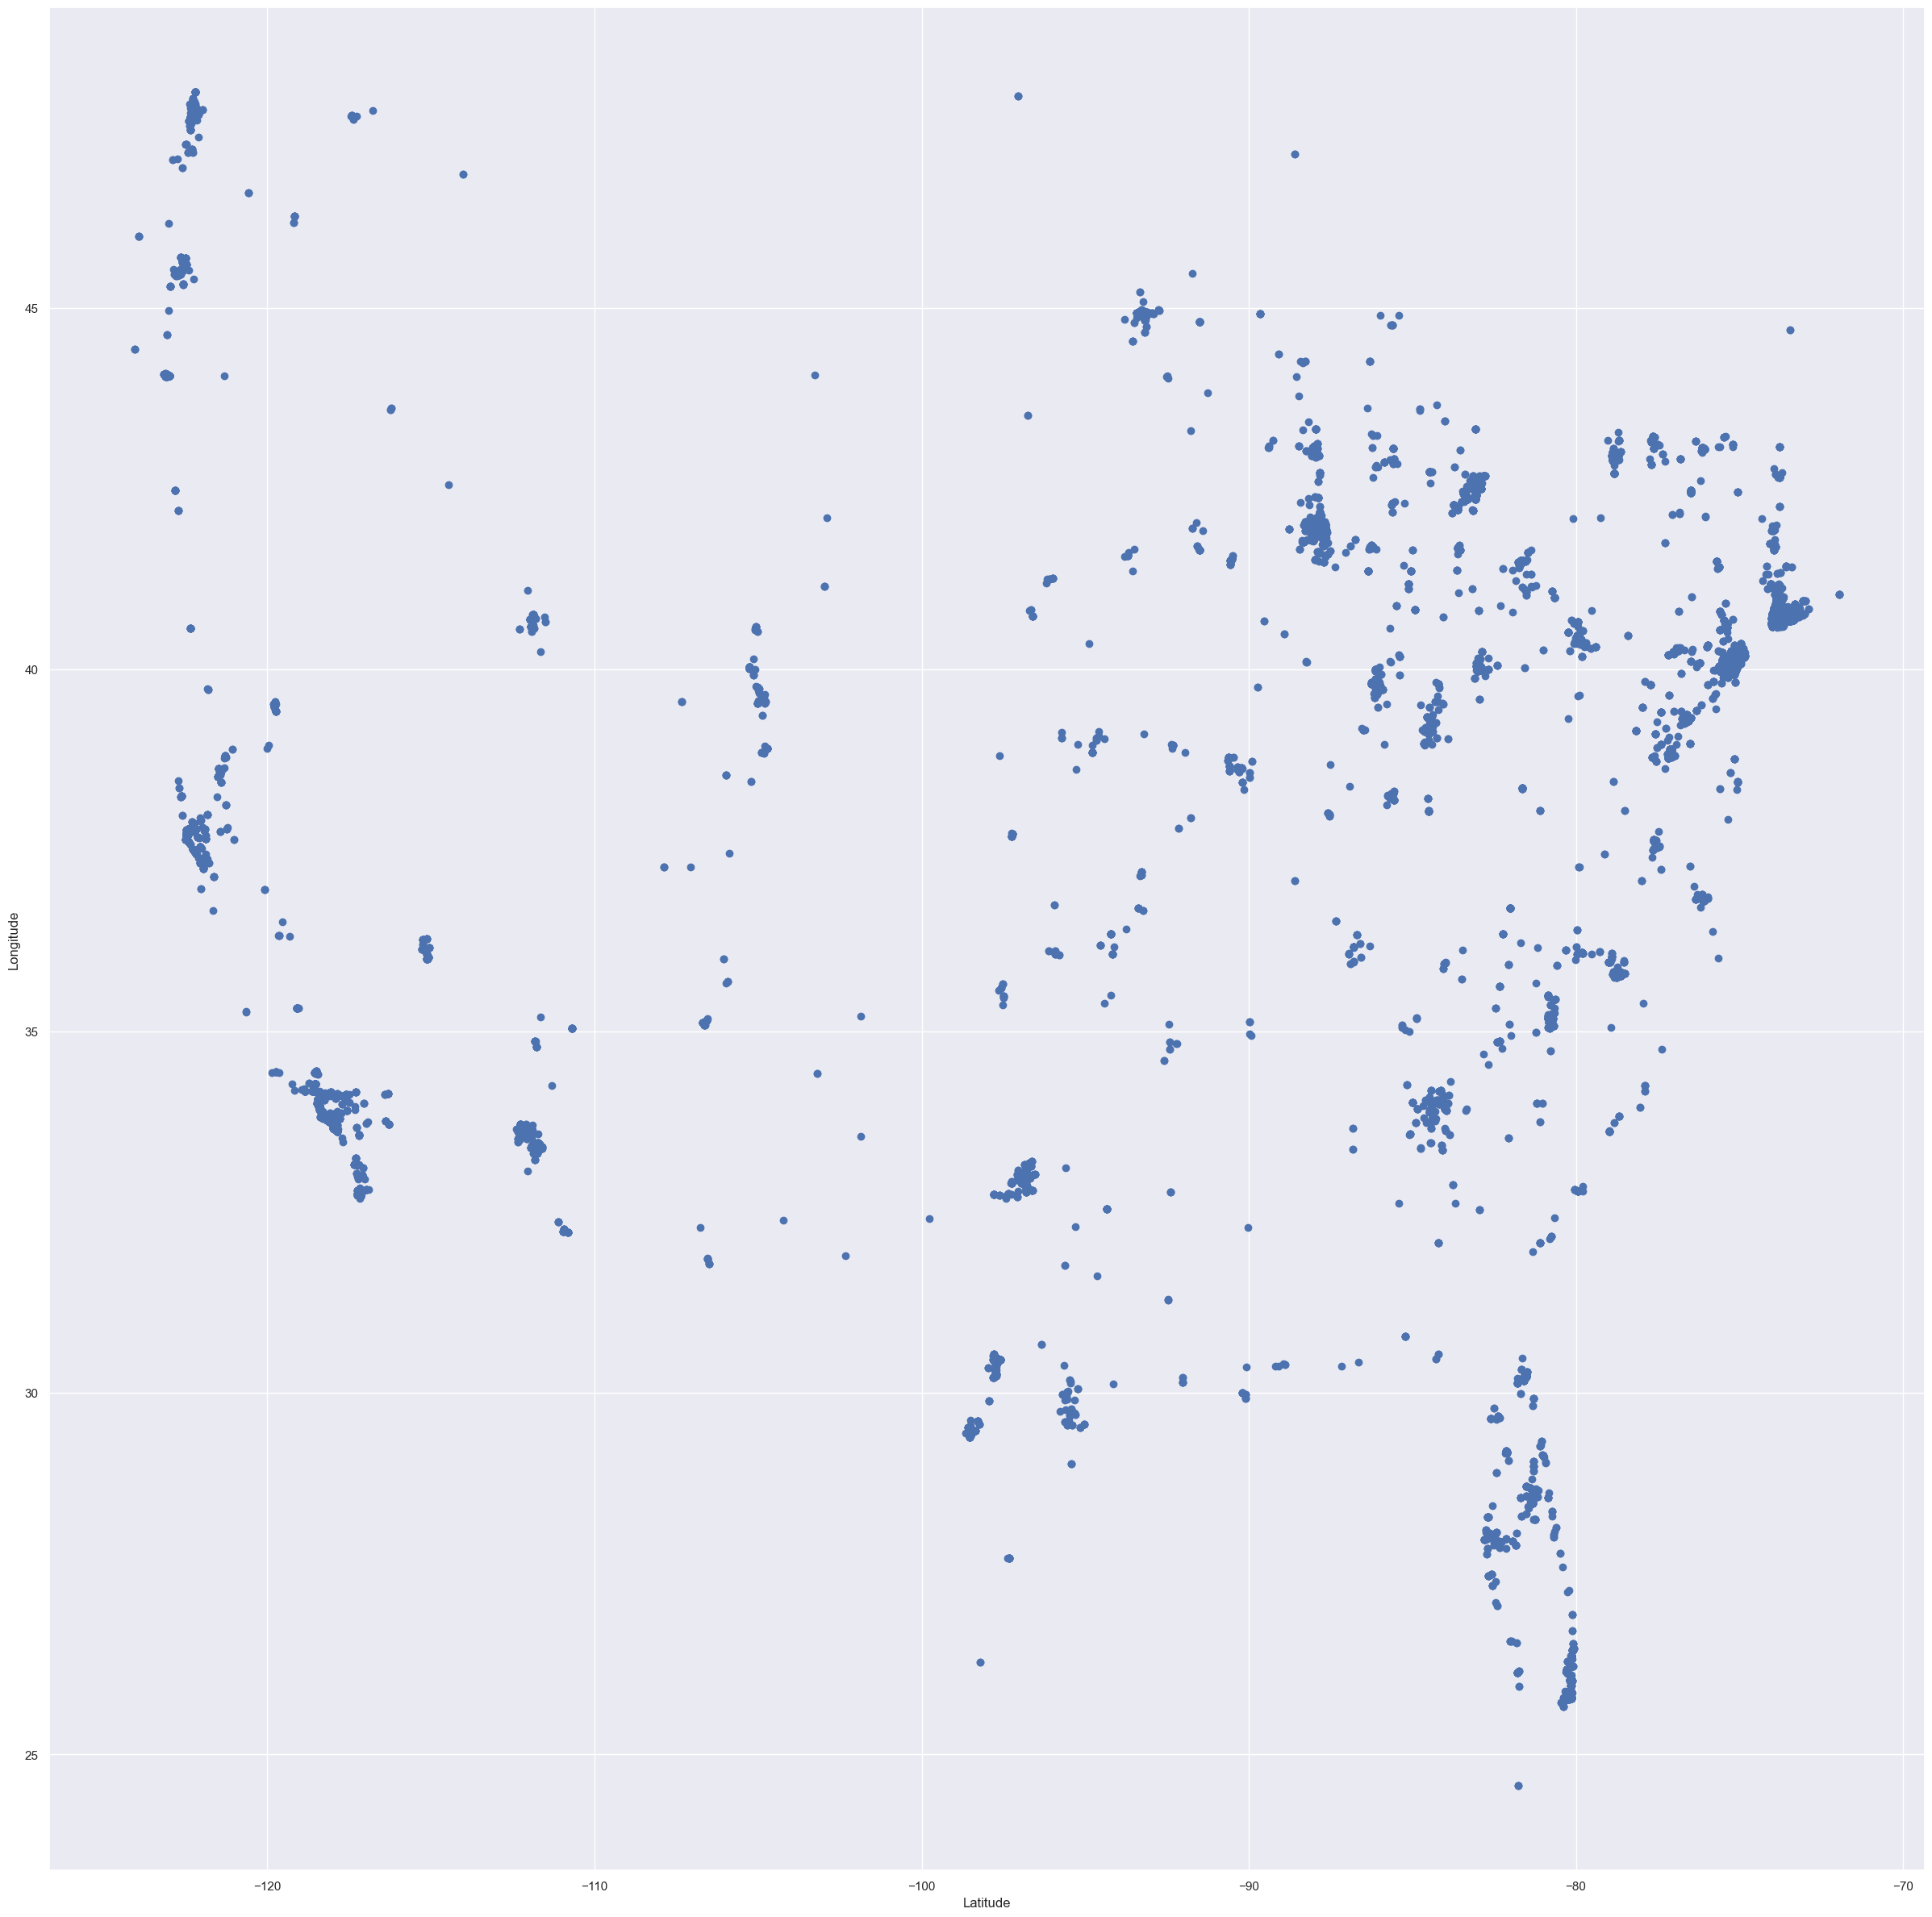

(9995, 19)

In [2]:
f, axes = plt.subplots(figsize=(30,30))

cleaned = pizza[(pizza['latitude'] < 50) & (pizza['longitude'] > -140)]
long_clean = cleaned["longitude"]
lat_clean = cleaned["latitude"]

plt.scatter(long_clean,lat_clean)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
cleaned.shape

Having removed 5 datapoints, we will now proceed to condense this dataset to represent unique shops only. However, as each shop would have different number of menu items with varying prices, we will represent **each** unique shop location with a **single datapoint**, where its price will be the **median** price of all its menu items for that location.

We have chosen to go with median prices instead of mean as it will be less affected by extreme outliers within each location.

Step (1): We will first remove all duplicate shops to obtain a comprehensive idea of the number of unqiue shops in US mainland

In [3]:
pizza_clean = cleaned.drop_duplicates(subset=['address'])
pizza_clean.shape

(2274, 19)

Step (2): We will then collect the median prices for each unique location. These prices will then be stored in a list to be added as a column to pizza_clean. 

Note that amountMax == amountMin, which represents the price of a single menu item

In [4]:
grp = cleaned.groupby('address')
median_price = []
for add in cleaned.address.unique():
    median_price.append(grp.get_group(add)["menus.amountMax"].median())

pizza_clean['Median_Price'] = median_price

C:\Users\conde\AppData\Local\Temp\ipykernel_15884\3257041635.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza_clean['Median_Price'] = median_price


In [5]:
pizza_clean.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province,Median_Price
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,http://www.citysearch.com/profile/menu/1550074...,7.98,7.98,NaN,Cheese Pizza,Shotgun Dans Pizza,72120,0,25,AR,7.98
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,NaN,Pizza Cookie,Sauce Pizza Wine,85012,0,25,AZ,6.00
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,http://www.citysearch.com/profile/menu/8160503...,6.49,6.49,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,0,25,OH,6.49
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,5.99,5.99,NaN,Small Pizza,Hungry Howies Pizza,48071,25,40,MI,5.99
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,5.49,5.49,NaN,Pizza Sub,Spartan Pizzeria,21224,0,25,MD,8.24


Similarly, we will perform Step (1) on the population dataset as well

In [6]:
cities.shape

(331, 13)

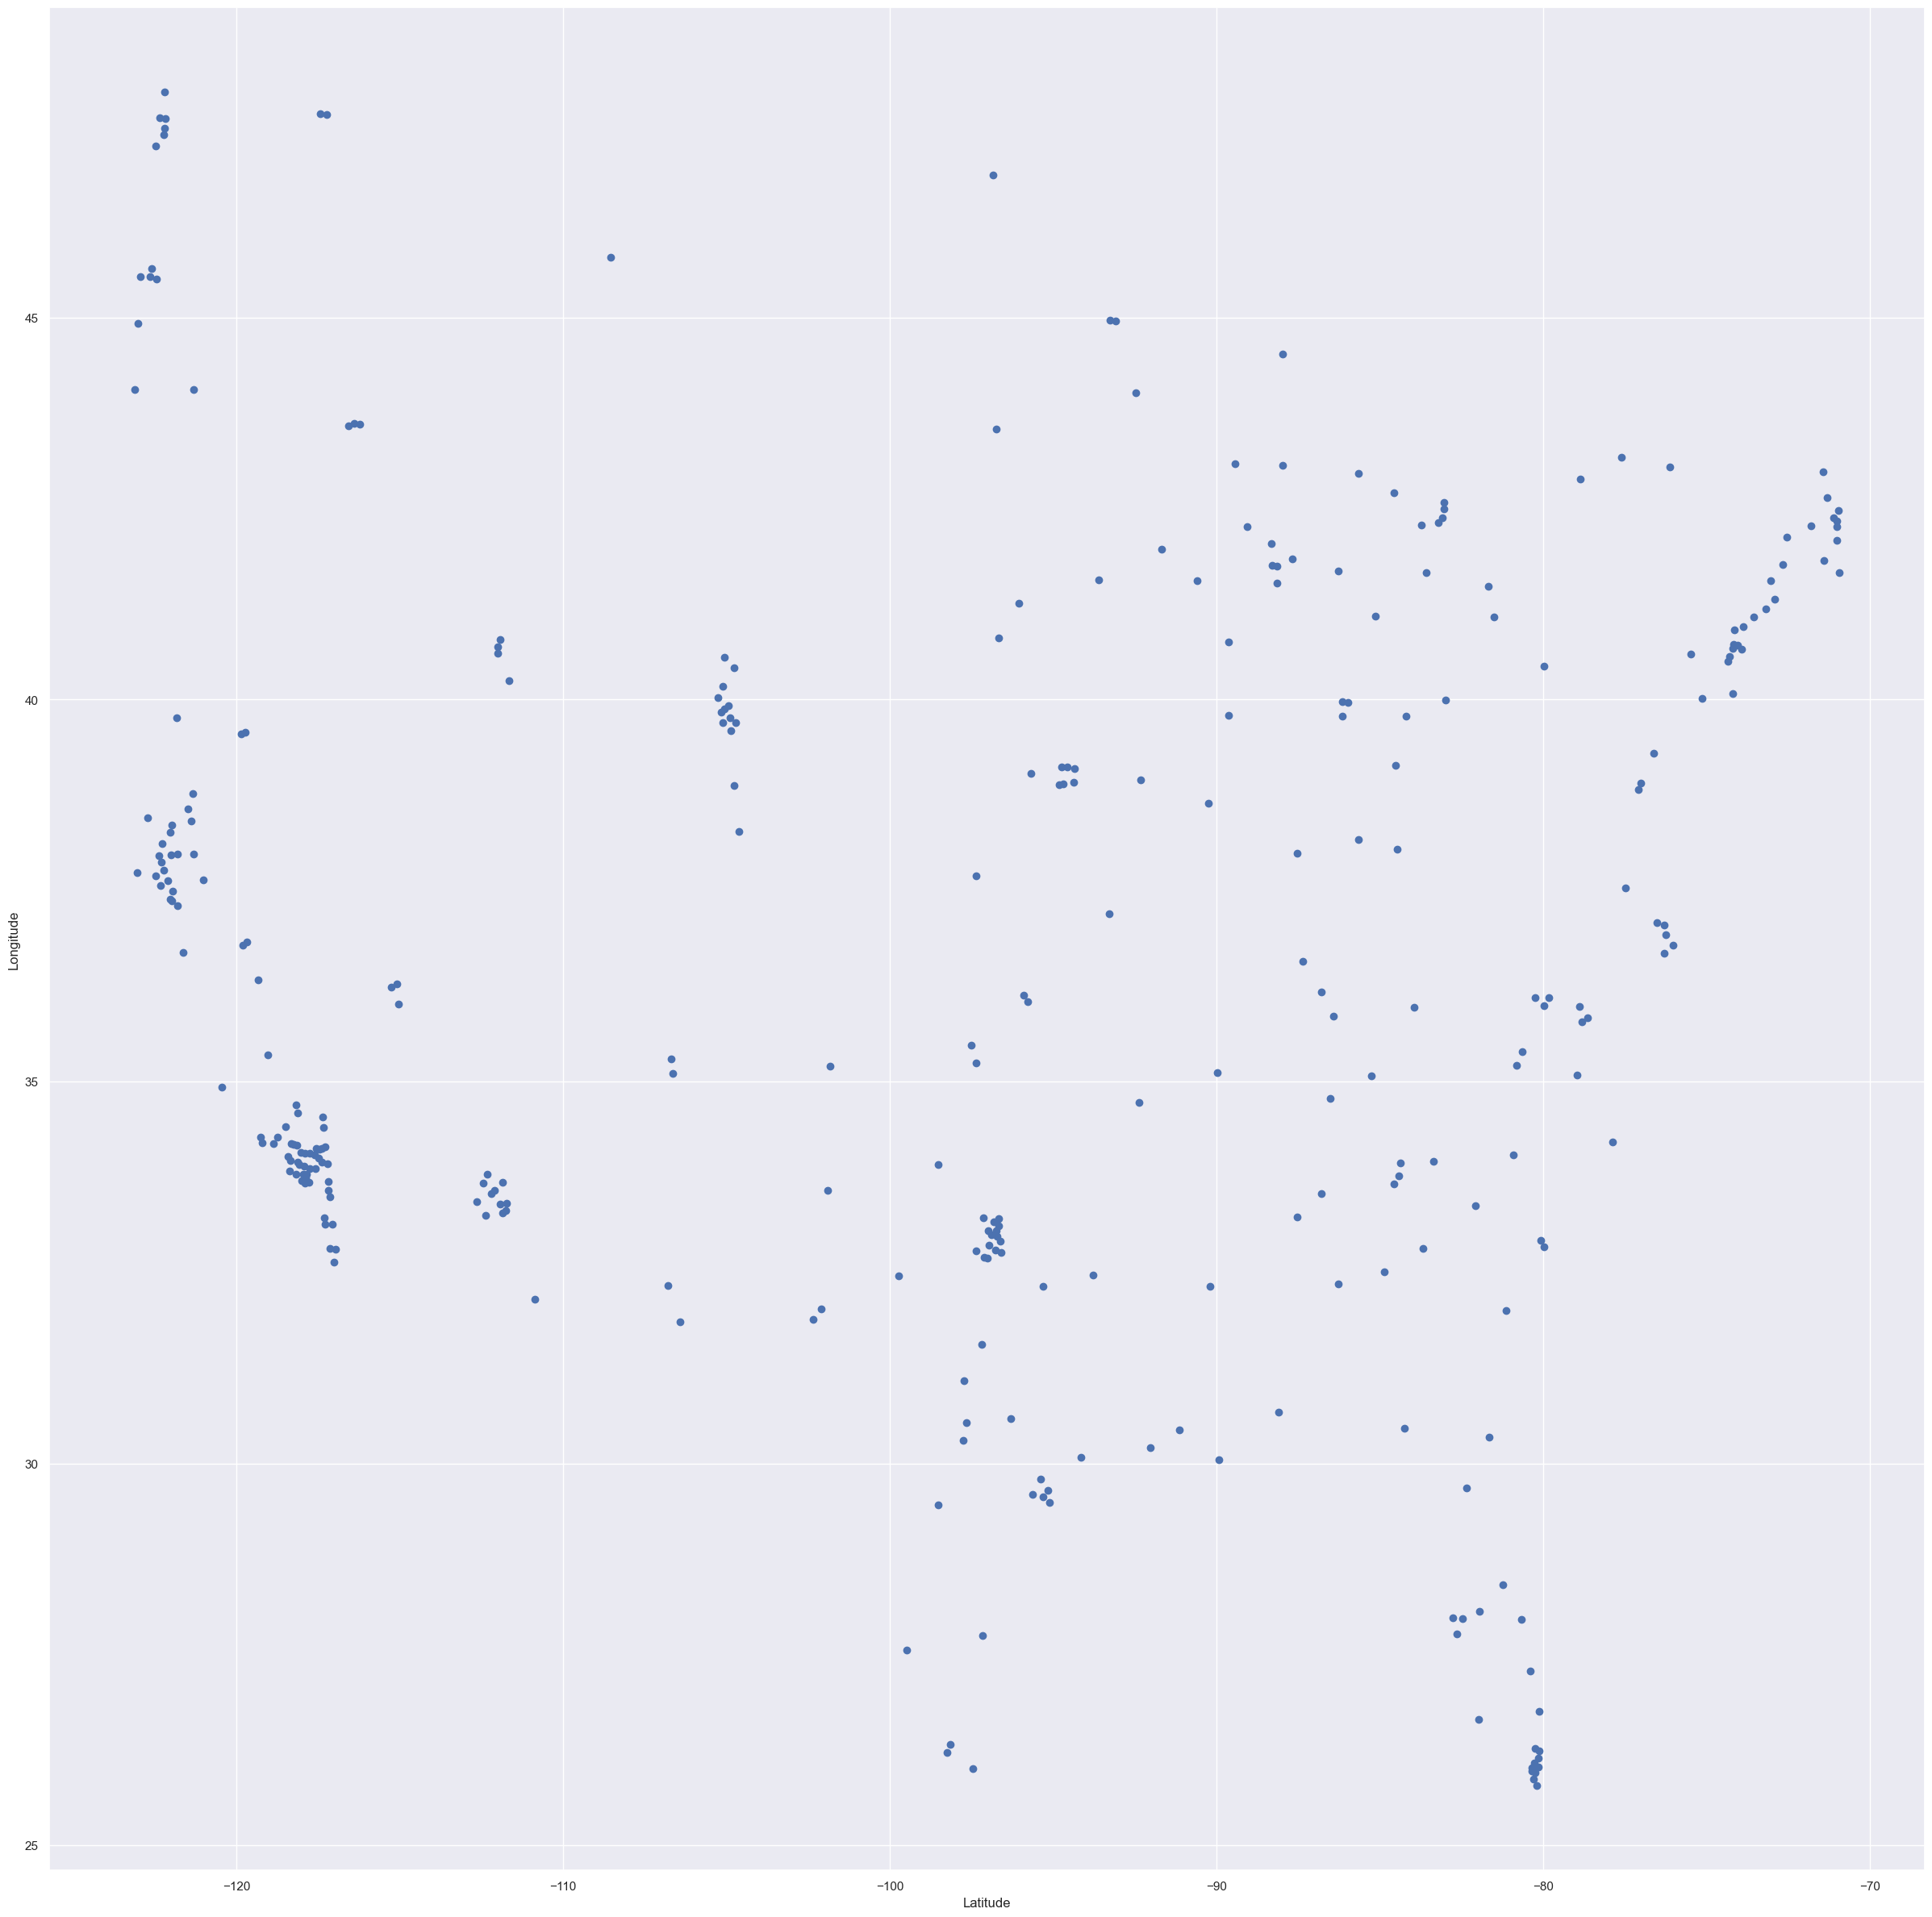

(329, 13)

In [7]:
f, axes = plt.subplots(figsize=(30,30))

cities = cities[(cities['Latitude'] < 50) & (cities['Longitude'] > -140)]

long_clean = cities['Longitude']
lat_clean = cities["Latitude"]

plt.scatter(long_clean,lat_clean)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
cities.shape

Having removed 2 cities, we are left with the top 329 US cities in the mainland and their respective populations.

Finally, we will export our dataframes as cleaned csv files to be used later on

In [8]:
pizza_clean.to_csv('pizza_clean.csv', index=False)
cities.to_csv('cities_clean.csv')